# Solving a Cereal Box Maze

In [1]:
from PIL import Image
import numpy as np

# Open the image
image = Image.open('tony-tiger.jpg').convert('LA') # convert to grey scale for stage 1
image = image.resize((64,64), Image.ANTIALIAS)

# lifting recursion limits so python does not cap out
import sys
sys.setrecursionlimit(5000)

In [2]:
# image for plotting, not for maze
img_for_plot = image.resize((512,512), Image.ANTIALIAS)

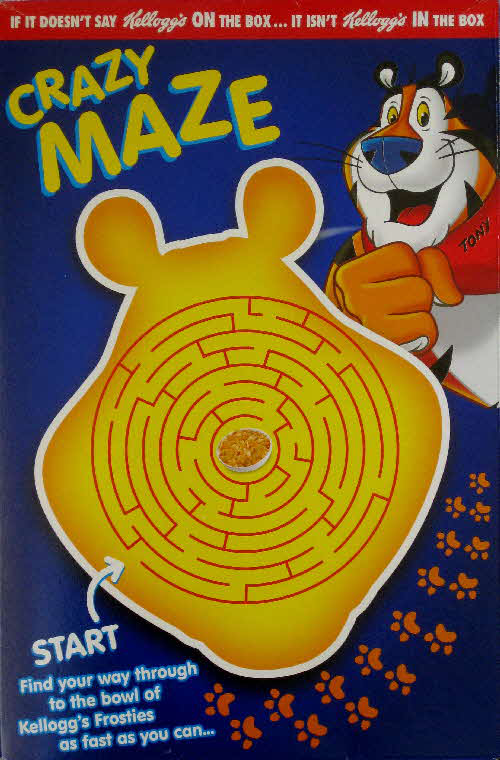

In [3]:
# original image
Image.open('tony-tiger.jpg')

In [4]:
# examining pixel values that make up the path
path_pixels = np.array(image.crop((30,53,40,55)))
path_pixels_ = []

for row in path_pixels:
    row = [np.mean(x) for x in row]
    path_pixels_.append(row)

In [5]:
# examining pixel values that make up the barriers
barrier = []
bar = np.array(image.crop((22,65,27,90)))

for row in bar:
    row = [np.mean(x) for x in row]
    barrier.append(row)

In [6]:
# barrier and path range for dfs
bar_range = [156,199] # taken from analyzing pixels of barrier
path_range = [200,210] # taken from analyzing pixels on path

In [7]:
# target bowl
bowl = image.crop((27,30,33,33)) # 29, 31
bowl = np.array(bowl)

In [8]:
# transform the graph as a 2d matrix
graph = []
for row in np.array(image):
    row = [np.mean(x) for x in row]
    graph.append(row)

In [9]:
# dfs

m = len(graph)
n = len(graph[0])
path = []

def dfs(i,j):
    if i<0 or j<0 or i>=m or j>=n or graph[i][j] == float('inf'):
        return
    if path_range[0]<=graph[i][j]<=path_range[1]:
        path.append([i,j])
    graph[i][j] = float('inf')
    dfs(i+1,j)
    dfs(i-1,j)
    dfs(i,j+1)
    dfs(i,j-1)

In [10]:
# approximating the starting point by the white arrow
start_approx = Image.fromarray(np.array(image)[15:19,45:49])
start = [17,47]

In [11]:
# run dfs on the maze
dfs(start[0],start[1])

In [12]:
# identify the path with "s" in the maze
for p in path:
    graph[p[0]][p[1]] = "s"

In [13]:
# imposing the path over the maze
img_for_plot = np.array(image)

for i in range(len(path)):
    img_for_plot[path[i][0]][path[i][1]] = 30
    Image.fromarray(img_for_plot).resize((512,512), Image.ANTIALIAS).save("maze_" + str(i) + ".png")